### 2.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import statsmodels.formula.api as sm
from numpy import linalg as la
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, linear_model
from sklearn.metrics import r2_score

In [56]:
train = pd.read_csv (r'/Users/zhuxiaoran/Desktop/STA243/train.data.csv') 
test = pd.read_csv (r'/Users/zhuxiaoran/Desktop/STA243/test.data.csv')
print(train)

       Unnamed: 0          id             date    price  bedrooms  bathrooms  \
0               2  6414100192  20141209T000000   538000         3       2.25   
1               4  2487200875  20141209T000000   604000         4       3.00   
2               5  1954400510  20150218T000000   510000         3       2.00   
3               6  7237550310  20140512T000000  1225000         4       4.50   
4               7  1321400060  20140627T000000   257500         3       2.25   
...           ...         ...              ...      ...       ...        ...   
15124       21609   263000018  20140521T000000   360000         3       2.50   
15125       21610  6600060120  20150223T000000   400000         4       2.50   
15126       21611  1523300141  20140623T000000   402101         2       0.75   
15127       21612   291310100  20150116T000000   400000         3       2.50   
15128       21613  1523300157  20141015T000000   325000         2       0.75   

       sqft_living  sqft_lot  floors  w

### (a)

In [57]:
#fit regression model using train datasets
reg = sm.ols(formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot", data = train).fit()

In [58]:
#compute R square using train datasets
r2_train = reg.rsquared
print(r2_train)

#compute R square using test datasets
r2_test = 1-sum((reg.predict(test) - test["price"]) ** 2) / sum((test["price"] - mean(test["price"])) ** 2)
print(r2_test)

0.5101138530794578
0.5049944614036821


In [22]:
reg_1 = linear_model.LinearRegression()
reg_1 = reg_1.fit(x, y)
coef = reg_1.coef_
coef = coef.reshape((4, 1))
print(coef)

[[-0.15147017]
 [ 0.00773629]
 [ 0.7918328 ]
 [-0.04514359]]


### (b)

In [59]:
house = pd.read_csv (r'/Users/zhuxiaoran/Desktop/STA243/fancyhouse.csv') 

house_1 = house.iloc[: , 1:5]
print(house_1)

   bedrooms  bathrooms  sqft_living  sqft_lot
0         8         25        50000    225000


In [60]:
y_pred = reg.predict(house_1)
print(y_pred)

0    1.543677e+07
dtype: float64


### (c)

In [61]:
reg_2 = sm.ols(formula = "price ~ (bedrooms * bathrooms) + bedrooms + bathrooms + sqft_living + sqft_lot", data = train).fit()

In [62]:
#compute R square using train datasets
r2_train = reg_2.rsquared
print(r2_train)

#compute R square using test datasets
r2_test = 1-sum((reg_2.predict(test) - test["price"]) ** 2) / sum((test["price"] - mean(test["price"])) ** 2)
print(r2_test)

0.5173532927738305
0.5105355458590244


In [121]:
reg_3 = linear_model.LinearRegression()
reg_3 = reg_3.fit(X, y)
coef_1 = reg_3.coef_
coef_1 = coef_1.reshape((5, 1))
print(coef_1)

[[-0.32877205]
 [-0.23326364]
 [ 0.77192759]
 [-0.04491517]
 [ 0.38964848]]


### (d)

### Gradient decent

In [63]:
#initializtion
x = train.iloc[: , 4:8]
y = train.iloc[: , 3]

#arrray form
y = np.array(y)
x = np.array(x)

y = y.reshape((15129, 1))

#compute mean using train datasets
mean_x = x.mean(axis = 0)

mean_y = y.mean(axis = 0)

#compute 
sd_x = x.std(axis = 0)
sd_y = y.std(axis = 0)
print(sd_x)

x = preprocessing.scale(x, axis = 0)
y = preprocessing.scale(y, axis = 0)

print(x)

#initializate beta
beta = np.zeros(4)
beta = beta.reshape((4, 1))

#compute stepsize
matrix = x.T @ x
c = np.linalg.svd(matrix)
A = c[1]
ita = 1 / (A[0] + A[3])
print(ita)

#tolerance level
tol = 1e-6

[9.38593151e-01 7.72097316e-01 9.18729486e+02 3.88703680e+04]
[[-0.3897894   0.18478631  0.54466986 -0.19175331]
 [ 0.67563496  1.15616645 -0.11929055 -0.24943221]
 [-0.3897894  -0.13900707 -0.42405926 -0.17019447]
 ...
 [-1.45521375 -1.75797398 -1.14244264 -0.34333407]
 [-0.3897894   0.50857969 -0.51113603 -0.31662993]
 [-1.45521375 -1.75797398 -1.14244264 -0.35038314]]
2.6553091398028097e-05


In [64]:
#compute gradient
def compute_grad(beta, x, y):
    grad = (-2) * np.dot(x.T, y) + 2 * (x.T @ x @ beta)
    grad = grad / len(y)
    return grad
grad = compute_grad(beta, x, y)
print(grad)

[[-0.60829035]
 [-1.04862522]
 [-1.40543949]
 [-0.19094618]]


In [65]:
#update gradient
def update_beta(beta, ita, grad):
    beta = beta - ita * grad
    return beta
beta = update_beta(beta, ita, grad)
print(beta)

[[1.61519893e-05]
 [2.78442413e-05]
 [3.73187631e-05]
 [5.07021127e-06]]


In [66]:
def compute_error(grad):
    error = la.norm(grad, 2)
    return error
error = compute_error(grad)
print(error)

1.8658383096119362


In [55]:
#gd process
i = 1
cost = []

#the number of max-iteration is 1000000
while error >= tol and i <= 1000000:
    grad = compute_grad(beta, x, y)
    error = compute_error(grad)
    cost.append(error)
    beta = update_beta(beta, ita, grad)
    i += 1
print(beta, i)
print(np.shape(cost))

[[-0.15146982]
 [ 0.00773797]
 [ 0.79183082]
 [-0.04514333]] 1000001
(1000000,)


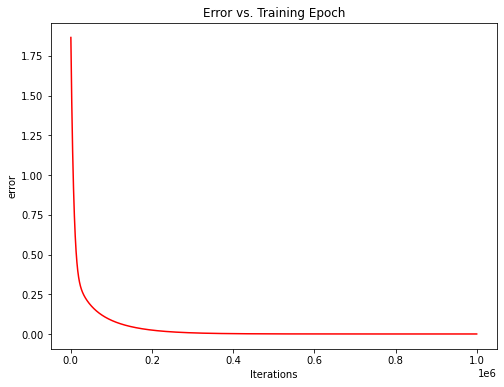

In [56]:
#plot
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(i-1), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('error') 
bx.set_title('Error vs. Training Epoch') 
plt.show()

#### (1) Model 1 without interaction term

In [57]:
#computing R^2 using train datasets
R2_model_1_train = 1- sum((y - np.dot(x, beta)) ** 2)[0] / sum((y - sum(y) / len(y)) ** 2)[0]
print(R2_model_1_train)

0.5101138530778362


In [67]:
x_te = test.iloc[: , 4:8]
y_te = test.iloc[: , 3]

#arrray form
y_te = np.array(y_te)
x_te = np.array(x_te)

y_te = y_te.reshape((6484, 1))

x_te = (x_te - mean_x) / sd_x
y_te = (y_te - mean_y) / sd_y
print(x_te, y_te)
print(np.shape(x_te), np.shape(y_te))

[[-0.3897894  -1.43418059 -0.9682891  -0.23270996]
 [-1.45521375 -1.43418059 -1.41455756 -0.12079952]
 [-0.3897894   0.50857969  1.62224494 -0.12604773]
 ...
 [-0.3897894  -0.13900707 -0.6308666  -0.34909682]
 [ 0.67563496  0.50857969  0.49024687 -0.22311396]
 [ 0.67563496  1.80375321  1.56782195 -0.19283383]] [[-0.86068373]
 [-0.97471694]
 [ 0.33843401]
 ...
 [-0.2970494 ]
 [ 0.19741657]
 [ 1.27737096]]
(6484, 4) (6484, 1)


In [59]:
#computing R^2 using test datasets
R2_model_1_test = 1- sum((y_te - np.dot(x_te, beta)) ** 2)[0] / sum((y_te - sum(y_te) / len(y_te)) ** 2)[0]
print(R2_model_1_test)

0.5049944973342906


In [68]:
#make predictions
house_11 = np.array(house_1)
house_11 = (house_11 - mean_x)/ sd_x

In [61]:
y_predict_1 = house_11 @ beta
print(y_predict_1)

[[40.54739121]]


In [62]:
y_predict_1 = y_predict_1 * sd_y + mean_y
print(y_predict_1)

[[15436751.09079698]]


#### (2) Model 2 with interaction term

In [69]:
train1 = np.array(train)
inter = train1[:, 4] * train1[:, 5] 
inter_mean = inter.mean(axis = 0)
inter_sd = inter.std(axis = 0)

inter = preprocessing.scale(inter, axis = 0)
inter = inter.reshape((15129, 1))

X = np.column_stack((x, inter))
print(X)

[[-0.3897894   0.18478631  0.54466986 -0.19175331 -0.16763147]
 [ 0.67563496  1.15616645 -0.11929055 -0.24943221  1.07009255]
 [-0.3897894  -0.13900707 -0.42405926 -0.17019447 -0.34444919]
 ...
 [-1.45521375 -1.75797398 -1.14244264 -0.34333407 -1.40535549]
 [-0.3897894   0.50857969 -0.51113603 -0.31662993  0.00918625]
 [-1.45521375 -1.75797398 -1.14244264 -0.35038314 -1.40535549]]


In [64]:
j = 1
cost_1 = []
beta = np.zeros(5)
beta = beta.reshape((5, 1))

matrix_1 = X.T @ X
B = np.linalg.svd(matrix_1)
A1 = B[1]
ita = 1 / (A1[0] + A1[4])
print(ita)

while error >= tol and j <= 1000000:
    grad = compute_grad(beta, X, y)
    error = compute_error(grad)
    cost_1.append(error)
    beta = update_beta(beta, ita, grad)
    j += 1
print(beta, j)
print(np.shape(cost_1))

2.058157174922585e-05
[[-0.27019451]
 [-0.15108553]
 [ 0.77314796]
 [-0.04458696]
 [ 0.26526678]] 1000001
(1000000,)


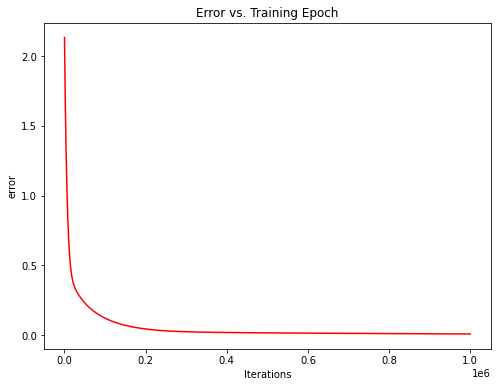

In [65]:
#plot
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(j-1), cost_1, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('error') 
bx.set_title('Error vs. Training Epoch') 
plt.show()

In [66]:
#computing R^2 using train datasets
R2_model_2_train = 1 - sum((y - np.dot(X, beta)) ** 2)[0] / sum((y - sum(y) / len(y)) ** 2)[0]
print(R2_model_2_train)

0.5165996950311904


In [70]:
test1 = np.array(test)
inter_test = test1[:, 4] * test1[:, 5] 

inter_test = (inter_test - inter_mean) / inter_sd 

X_1 = np.column_stack((x_te, inter_test))
print(X_1)

[[-0.3897893973798207 -1.4341805945974897 -0.9682890960231543
  -0.23270995977910205 -1.0517200593699358]
 [-1.4552137502179976 -1.4341805945974897 -1.4145575638872028
  -0.12079951948272659 -1.2874770162709708]
 [-0.3897893973798207 0.508579687953025 1.6222449369437622
  -0.12604773323455662 0.00918624668472214]
 ...
 [-0.3897893973798207 -0.13900707289714656 -0.6308665959308248
  -0.34909681768733253 -0.3444491886668305]
 [0.6756349554583562 0.508579687953025 0.4902468721178827
  -0.22311396110541284 0.5985786389373099]
 [0.6756349554583562 1.8037532096533682 1.5678219530579025
  -0.19283382588039355 1.5416064665414502]]


In [68]:
R2_model_2_test = 1 - sum((y_te - np.dot(X_1, beta)) ** 2)[0] / sum((y_te - sum(y_te) / len(y_te)) ** 2)[0]
print(R2_model_2_test)

0.5102078240983928


In [71]:
house_12 = np.array(house_1)
house_12 = house_12.reshape(4, 1)
house_inter = house_12[0] * house_12[1]
house_inter = (house_inter - inter_mean)/ inter_sd
house_final = np.column_stack((house_11, house_inter))
print(house_final)

[[ 4.93733237 29.64998393 52.17031237  5.41040615 45.39240045]]


In [70]:
y_predict_2 = house_final @ beta
print(y_predict_2)

[[46.32150893]]


In [71]:
y_predict_2 = y_predict_2 * sd_y + mean_y
print(y_predict_2)

[[17558374.5015014]]


### (e)

#### Calculate beta with SGD -- Model-1

In [98]:
#initializate theta
theta = np.ones(4)
theta = theta.reshape((4, 1))

In [99]:
def compute_sto_grad(theta, x, y):
    grad = (-2) * np.dot(x.T, y) + 2 * (x.T @ x @ theta)
    return grad

In [100]:
def sgd(x, y, theta_0, max_iter, loss, c):
    
    def stepsize(t):
        return c / (t + 1)
    
    cur_iter = 1
    theta = theta_0
    error = 1
    n = len(x)
    
    for cur_iter in range(max_iter):  
        #set tolerance level is 1e-6
        if error > 1e-6:
            i = np.random.choice(n, size = 1, replace = False)
            gradient = compute_sto_grad(theta, x[i], y[i])
            theta = theta - stepsize(cur_iter) * gradient
            error = la.norm(gradient, 2)
            diff = la.norm((theta - coef), 2)
            loss.append(diff)
        else:
            break 

    return theta

In [105]:
max_iter = 1000
c1, c2, c3 = 1.0, 1.5, 2.0
loss_1, loss_2, loss_3 = [], [], []

theta_1 = sgd(x, y, theta, max_iter, loss_1, c1)
theta_2 = sgd(x, y, theta, max_iter, loss_2, c2)
theta_3 = sgd(x, y, theta, max_iter, loss_3, c3)
print(theta_1, theta_2, theta_3)

[[-0.41569106]
 [-0.40085405]
 [ 1.32981046]
 [-0.23061423]] [[-0.20985349]
 [ 0.04530521]
 [ 0.7823556 ]
 [-0.04445006]] [[-0.1540242 ]
 [ 0.10747525]
 [ 0.58350387]
 [-0.07964497]]


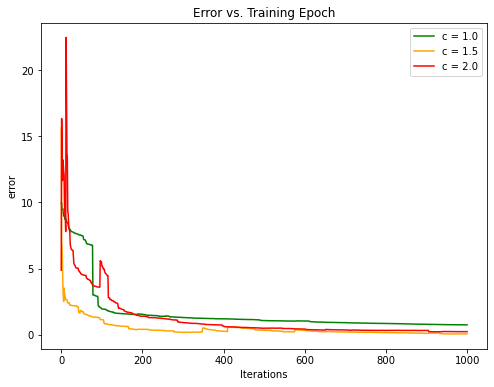

In [117]:
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(1000), loss_1, 'green', label = 'c = 1.0')
bx.plot(np.arange(1000), loss_2, 'orange', label = 'c = 1.5')
bx.plot(np.arange(1000), loss_3, 'red', label = 'c = 2.0')
bx.set_xlabel('Iterations') 
bx.set_ylabel('error') 
bx.set_title('Error vs. Training Epoch') 
plt.legend()
plt.show()

In [108]:
max_iter = 2000000
c2 = 1.5
loss = []

theta_2 = sgd(x, y, theta, max_iter, loss, c2)
print(theta_2)
#the number of iteration is 458944

[[-0.15341925]
 [ 0.00771326]
 [ 0.79792381]
 [-0.04568012]]


In [111]:
R2_model_1_sgd_train = 1- sum((y - np.dot(x, theta_2)) ** 2)[0] / sum((y - sum(y) / len(y)) ** 2)[0]
print(R2_model_1_sgd_train)

0.5100875451774329


In [112]:
R2_model_1_sgd_test = 1- sum((y_te - np.dot(x_te, theta_2)) ** 2)[0] / sum((y_te - sum(y_te) / len(y_te)) ** 2)[0]
print(R2_model_1_sgd_test)

0.5049130721492737


In [113]:
y_predict_1_sgd = house_11 @ theta_2
print(y_predict_1_sgd)

y_predict_1_sgd = y_predict_1_sgd * sd_y + mean_y
print(y_predict_1_sgd)

[[40.85200261]]
[[15548676.53096694]]


#### Calculate beta using SGD -- Model-2

In [141]:
def sgd_1(x, y, theta_0, max_iter, loss, c):
    
    def stepsize(t):
        return c / (t + 1)
    
    cur_iter = 1
    theta = theta_0
    error = 1
    n = len(x)
    
    for cur_iter in range(max_iter):  
        #set tolerance level is 1e-6
        if error > 1e-6:
            i = np.random.choice(n, size = 1, replace = False)
            gradient = compute_sto_grad(theta, x[i], y[i])
            theta = theta - stepsize(cur_iter) * gradient
            error = la.norm(gradient, 2)
            diff = la.norm((theta - coef_1), 2)
            loss.append(diff)
        else:
            break 

    return theta

In [146]:
theta = np.zeros(5)
theta = theta.reshape((5, 1))

max_iter = 2000
b1, b2, b3 = 1.0, 1.5, 2.0
loss_4, loss_5, loss_6 = [], [], []

theta_21 = sgd_1(X, y, theta, max_iter, loss_4, b1)
theta_22 = sgd_1(X, y, theta, max_iter, loss_5, b2)
theta_23 = sgd_1(X, y, theta, max_iter, loss_6, b3)
print(theta_21, theta_22, theta_23)

[[-0.4851394 ]
 [-0.74981943]
 [ 0.71658043]
 [-0.07156431]
 [ 1.2850432 ]] [[-0.792417  ]
 [-1.14815197]
 [ 0.01811575]
 [ 0.00635118]
 [ 2.30914917]] [[-0.66388646]
 [-0.70550637]
 [ 0.79259609]
 [-0.09223527]
 [ 0.96488228]]


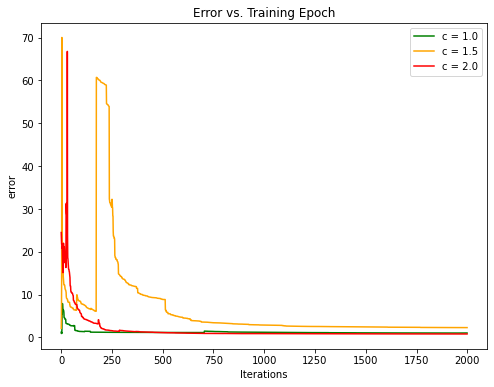

In [147]:
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(2000), loss_4, 'green', label = 'c = 1.0')
bx.plot(np.arange(2000), loss_5, 'orange', label = 'c = 1.5')
bx.plot(np.arange(2000), loss_6, 'red', label = 'c = 2.0')
bx.set_xlabel('Iterations') 
bx.set_ylabel('error') 
bx.set_title('Error vs. Training Epoch') 
plt.legend()
plt.show()

In [148]:
theta = np.zeros(5)
theta = theta.reshape((5, 1))
max_iter = 3000000
theta = sgd_1(X, y, theta, max_iter, loss_2, b1)
print(theta)

#the number of iteration is 890367

[[-0.32405872]
 [-0.22703159]
 [ 0.76932865]
 [-0.04505542]
 [ 0.38963711]]


In [151]:
R2_model_2_sgd_train = 1 - sum((y - np.dot(X, theta)) ** 2)[0] / sum((y - sum(y) / len(y)) ** 2)[0]
print(R2_model_2_sgd_train)

0.5172943336592097


In [152]:
R2_model_2_sgd_test = 1 - sum((y_te - np.dot(X_1, theta)) ** 2)[0] / sum((y_te - sum(y_te) / len(y_te)) ** 2)[0]
print(R2_model_2_sgd_test)

0.5105048138882426


In [153]:
y_predict_2_sgd = house_final @ theta
print(y_predict_2_sgd)

[[49.247443]]


In [154]:
y_predict_2_sgd = y_predict_2_sgd * sd_y + mean_y
print(y_predict_2_sgd)

[[18633470.39349658]]
